## Making maps with Cartopy

### Pre-processing

In [3]:
#options for installing cartopy, choose a line to uncomment and run:

# via pip:
# pip install cartopy

# via conda:
# conda install -c conda-forge cartopy


In [4]:
# Reading cartopy package
import cartopy.crs as ccrs # you will need this to run cartopy (just like opening a program)
import cartopy.io.img_tiles as cimgt
# These two are needed for shapefiles
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature

### Plotting maps
Reference: https://scitools.org.uk/cartopy/docs/latest/matplotlib/intro.html

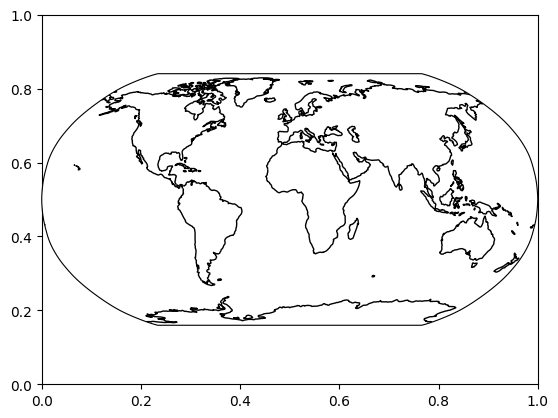

In [10]:
# Make a standard map
import matplotlib.pyplot as plt # import plotting package

fig, axs = plt.subplots() # make a figure

ax = plt.axes(projection=ccrs.Robinson())# projecting a plot using ccrs and plot using plt's axes. Then, save it as a variable 'ax'
# Mercator is a type of projection, there are many more to explore (https://scitools.org.uk/cartopy/docs/latest/reference/projections.html#cartopy-projections)

ax.coastlines() # add in coastlines

# Save the plot by calling plt.savefig() BEFORE plt.show()
#plt.savefig('coastlines.png') # you can save it as pdf too (just change the .[output])

plt.show() # close loop

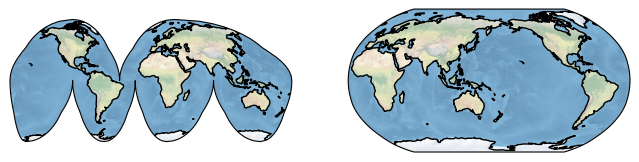

In [11]:
# Try adding in a colored figure to the map (ax.stock_img() )and centralize to Australia

# Using subplots

plt.figure(figsize = (8,10)) # make a figure

ax1 = plt.subplot(1, 2, 1, projection=ccrs.InterruptedGoodeHomolosine()) # subplot 1
ax1.coastlines()
ax1.stock_img()

ax2 = plt.subplot(1, 2, 2, projection=ccrs.Robinson(160)) # subplot 2
ax2.coastlines()
ax2.stock_img()

plt.show()
# Now change the figure size using figsize=(8, 10) # width, height in inches
# and play around with the order of subplot # (row, col, num)


### Adding data in map

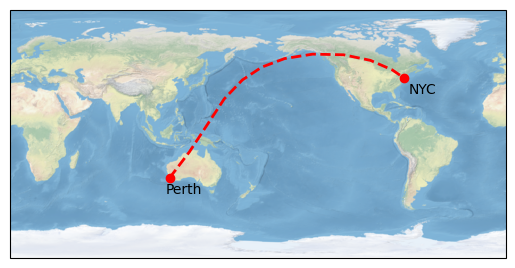

In [13]:
# Let's add the coordinates of Perth, Australia to New York City

# Input coordinates here

pe = [115.8,-31.9] # location of Perth, Australia. order is [lon,lat]
ny = [-74.0, 40.7] # location of NYC

# Plot here
ax = plt.axes(projection=ccrs.PlateCarree(180))
ax.stock_img()


# Plotting using a straight line on a sphere using ccrs.Geodetic() (this is the shortest path to travel)
# change the line properties

plt.plot([pe[0], ny[0]], [pe[1], ny[1]],
         color='red', linewidth=2, marker='o',linestyle='dashed',
         transform=ccrs.Geodetic())


# Add texts using plt.text
plt.text(pe[0] - 3, pe[1] - 12, 'Perth',
         transform=ccrs.PlateCarree())

plt.text(ny[0] + 3, ny[1] - 12, 'NYC',
         transform=ccrs.PlateCarree())

plt.show()


### Defining features on map

/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning

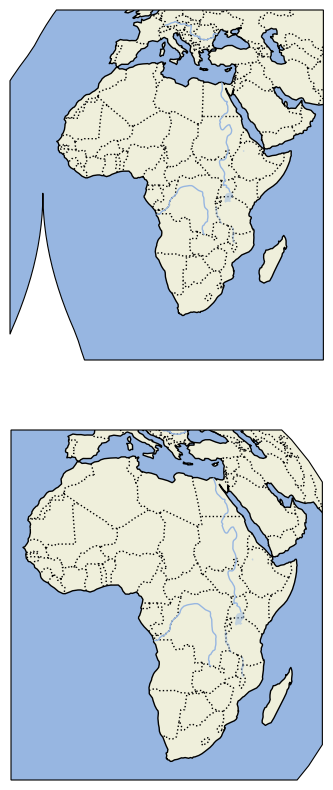

In [14]:
# Using cartopy.feature
import cartopy.feature as cfeature

fig = plt.figure(figsize=(8,10))
ax = fig.add_subplot(2, 1, 1, projection=ccrs.InterruptedGoodeHomolosine())
ax.set_extent([-20, 60, -40, 45], crs=ccrs.Geodetic())
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)

ax = fig.add_subplot(2, 1, 2, projection=ccrs.Orthographic())
ax.set_extent([-20, 60, -40, 45], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)

### Making vectors

We will be plotting GPS vectors in the end of this

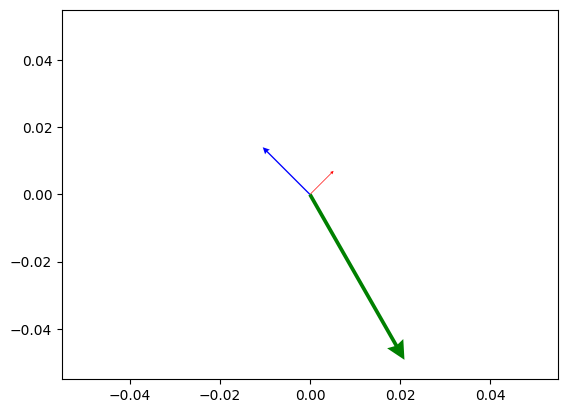

In [15]:
# Simple plot using quiver
# Plot 3 different arrows from 0,0 coordinates
import numpy as np

V = np.array([[1,1], [-2,2], [4,-7]])
origin = np.array([[0, 0, 0],[0, 0, 0]]) # origin point

plt.quiver(*origin, V[:,0], V[:,1], color=['r','b','g'], scale=21,headwidth=5,minshaft=10) # scale reduces values
plt.show()


### Plotting 2019 Ridgecrest earthquake

In [ ]:
# Import image tiles (for plotting basemap)
import cartopy.io.img_tiles as cimgt

# Import pandas to read data
import pandas as pd

# Load GPS data
data = pd.read_csv('GPS_Ridgecrest.csv');

X = pd.read_csv('GPS_Ridgecrest.csv', skipinitialspace=True, usecols=["X"]);
Y = pd.read_csv('GPS_Ridgecrest.csv', skipinitialspace=True, usecols=["Y"]);
E = pd.read_csv('GPS_Ridgecrest.csv', skipinitialspace=True, usecols=["E"]);
N = pd.read_csv('GPS_Ridgecrest.csv', skipinitialspace=True, usecols=["N"]);

# print the data to see it
print(pd.read_csv('GPS_Ridgecrest.csv'))


In [ ]:
# Define a function for quiver data (convert items to arrays)

def quiverData(X, Y, E, N): # input
    import cartopy.crs as ccrs
    import numpy as np
    """
    Function for converting input data to arrays (Quiver requires arrays).

    Returns numpy arrays of your input data and the platecarree CRS.
    """
    crs = ccrs.PlateCarree() # this is the projection
    x = np.asarray(X)
    y = np.asarray(Y)
    u = np.asarray(E)
    v = np.asarray(N)
    return x, y, u, v, crs # output


Doing quiver...
Doing shapefile...
Doing inset...


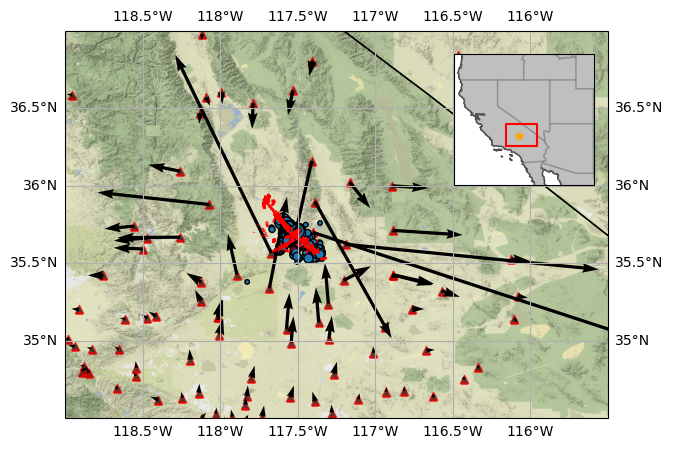

Done


In [ ]:
# Setting up figure

# Create a Stamen terrain background instance.
stamen_terrain = cimgt.Stamen('terrain-background')

# Make a basemap of the area (in Southern California)
fig = plt.figure(figsize = (7,10))

ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.add_feature(cfeature.STATES, linestyle='-')
ax.set_extent([-119, -115.5, 37, 34.5], crs=ccrs.PlateCarree())
#ax.add_image(stamen_terrain,8) # what happens if you change the number?
ax.coastlines()

# Plot GPS locations as points
ax.scatter(X,Y, color='black', alpha=0.7, transform=ccrs.PlateCarree(),marker='^',edgecolors='r',label='GPS stations')

# Add grid lines
ax.gridlines(draw_labels=True)

# get a terrain image
stamen_terrain = cimgt.Stamen('terrain-background')
ax.add_image(stamen_terrain,12)

# [Optional] Plotting Earthquakes
lat = pd.read_csv('RidgecrestEQ.csv', skipinitialspace=True, usecols=["latitude"]);
lon = pd.read_csv('RidgecrestEQ.csv', skipinitialspace=True, usecols=["longitude"]);
mag = pd.read_csv('RidgecrestEQ.csv', skipinitialspace=True, usecols=["mag"]);
dep = pd.read_csv('RidgecrestEQ.csv', skipinitialspace=True, usecols=["depth"]);

ax.scatter(lon,lat,edgecolor='k',s=mag**2.5,label='Aftershocks') # plot aftershocks (size tells magnitude)

# Making vectors
print('Doing quiver...')
# Convert X, Y, E and N data to numpy arrays
x, y, u, v, vector_crs = quiverData(X, Y, E, N)
# Plot vectors
ax.quiver(x, y, u, v, transform=vector_crs)


## [Optional] Shapefiles
print('Doing shapefile...')
# Plot/read shapefile
# These two are needed for shapefiles
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature

ridgecrest_shpFile = './Surface_Rupture_Ridgecrest_Prov_Rel_1/Surface_Rupture_Ridgecrest_Prov_Rel_1.shp'
ridgecrest_feature = ShapelyFeature(Reader(ridgecrest_shpFile).geometries(), ccrs.PlateCarree(), facecolor='none')
ax.add_feature(ridgecrest_feature,edgecolor='red', linewidth=2) # Plot surface rupture feature


# [Optional] Making inset
print('Doing inset...')

# Making the inset here
left, bottom, width, height = [0.68, 0.5, 0.2, 0.2]
ax2 = fig.add_axes([left, bottom, width, height],projection=ccrs.PlateCarree())
ax2.set_extent([-125, -109, 45, 30], crs=ccrs.PlateCarree())
ax2.add_feature(cfeature.COASTLINE)
ax2.add_feature(cfeature.STATES,color='grey',alpha=0.5)

# Including a point to show location of region of interests
lonmin=-119
lonmax=-115.5
latmin=34.5
latmax=37
plt.plot([lonmin,lonmax,lonmax,lonmin,lonmin],[latmin,latmin,latmax,latmax,latmin],'-r')
plt.plot(-117.5,35.6,'*',color='orange')

plt.show()

print('Done')


### Plotting for 2021 Alaska earthquake

In [ ]:
## For Alaska
# data reading
data = pd.read_csv('GPS_Alaska2021.csv')
#print(data)

# Load GPS data
Sta = pd.read_csv('GPS_Alaska2021.csv', skipinitialspace=True, usecols=["Sta"]);
# could not read X as data["Lon"]
X = pd.read_csv('GPS_Alaska2021.csv', skipinitialspace=True, usecols=["Lon"]);
Y = pd.read_csv('GPS_Alaska2021.csv', skipinitialspace=True, usecols=["Lat"]);
E = pd.read_csv('GPS_Alaska2021.csv', skipinitialspace=True, usecols=["de(m)"]);
N = pd.read_csv('GPS_Alaska2021.csv', skipinitialspace=True, usecols=["dn(m)"]);
U = pd.read_csv('GPS_Alaska2021.csv', skipinitialspace=True, usecols=["du(m)"]);


In [ ]:
# Setting up figure

# Create a Stamen terrain background instance.
stamen_terrain = cimgt.Stamen('terrain-background')

fig = plt.figure(figsize = (10,10))

ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax = plt.axes(projection=ccrs.Mercator())
ax.add_feature(cfeature.STATES, linestyle='-')
ax.set_extent([-163.7796, -151.8375, 53.7227, 58.7353], crs=ccrs.PlateCarree())
#ax.add_image(stamen_terrain,8) # what happens if you change the number?
ax.add_feature(cfeature.COASTLINE)

# get a terrain image
stamen_terrain = cimgt.Stamen('terrain-background')
ax.add_image(stamen_terrain,8)

# Plot gridlines and label axis
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.1, linestyle='--')

# Erase top and right axis labels
gl.top_labels=False
gl.right_labels=False



# Plotting Aftershocks
lat = pd.read_csv('AlaskaEQ.csv', skipinitialspace=True, usecols=["latitude"]);
lon = pd.read_csv('AlaskaEQ.csv', skipinitialspace=True, usecols=["longitude"]);
mag = pd.read_csv('AlaskaEQ.csv', skipinitialspace=True, usecols=["mag"]);
dep = pd.read_csv('AlaskaEQ.csv', skipinitialspace=True, usecols=["depth"]);

ax.scatter(lon,lat,transform=ccrs.PlateCarree(), edgecolor='k',s=mag**3,label='Aftershocks') # plot aftershocks (size tells magnitude)

# Plot mainshock
ax.scatter(-157.888, 55.364, transform=ccrs.PlateCarree(), marker='*', c='yellow', edgecolors='red', s=300.0, linewidths=1.0, label='Chignik Earthquake')


## Plot arrows
# plot GPS locations
ax.scatter(X, Y, transform=ccrs.PlateCarree(), marker='^', c='b', edgecolors='b', s=200.0, linewidths=1.0, label='GPS stations')

# Convert X, Y, E and N data to numpy arrays
x, y, u, v, vector_crs = quiverData(X, Y, E, N)
# Plot vectors
q = ax.quiver(x, y, u, v, transform=vector_crs,scale=2,color='black',label='GPS vectors') # play with the scale (it divides the value)
plt.quiverkey(q,X=0.77,Y=0.93,U=1/2, label ='0.5 m',color='black') # make quiver legend

# Add shapefile
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
map_shpFile = './AlaskaFaultsShapefiles/mp141-qflt-line-alaska.shp'
map_feature = ShapelyFeature(Reader(map_shpFile).geometries(), ccrs.PlateCarree(), facecolor='none')
ax.add_feature(map_feature,edgecolor='red', linewidth=2,label='Faults') # Plot surface rupture feature


## Plot map inset as box
# Making the inset here
left, bottom, width, height = [0.12, 0.48, 0.2, 0.2]
ax2 = fig.add_axes([left, bottom, width, height],projection=ccrs.Mercator())
ax2.set_extent([-170, -130, 50, 72], crs=ccrs.PlateCarree())
ax2.add_feature(cfeature.COASTLINE)
ax2.add_feature(cfeature.STATES,color='grey',alpha=0.5)
plt.plot([-163.7796, -151.8375, -151.8375, -163.7796, -163.7796],[58.7353, 58.7353, 53.7227, 53.7227, 58.7353],'-r',transform=ccrs.PlateCarree())


ax.legend(loc='upper left')

plt.show()